In [1]:
using ForwardDiff

In [2]:
cond(f, x) = abs(x*ForwardDiff.derivative(f, x)/f(x))

cond (generic function with 1 method)

In [3]:
using Plots

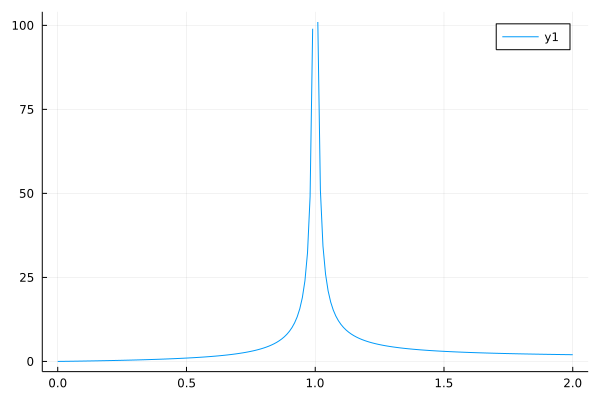

In [5]:
x = 0:0.01:2
plot(x, cond.(x -> x-1, x))

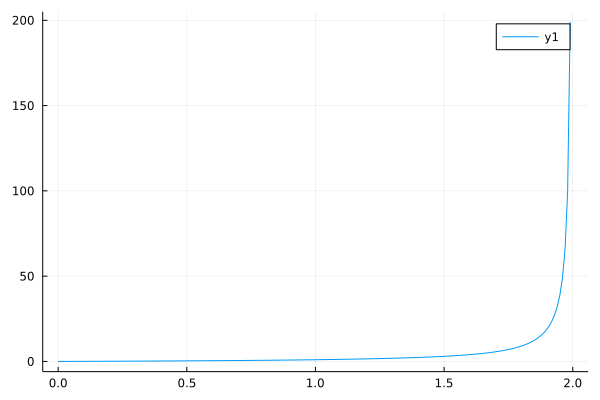

In [6]:
plot(x, cond.(x -> x-2, x))

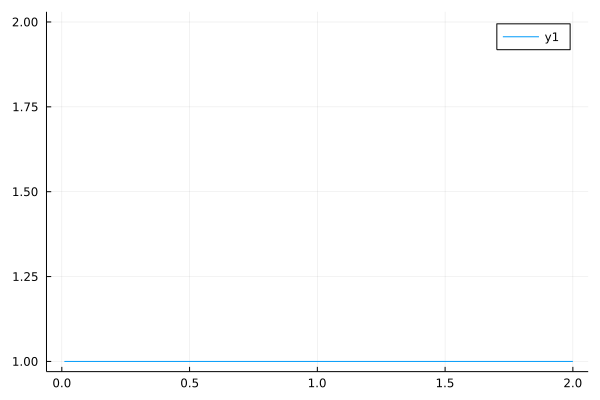

In [7]:
plot(x, cond.(x -> 2x, x))

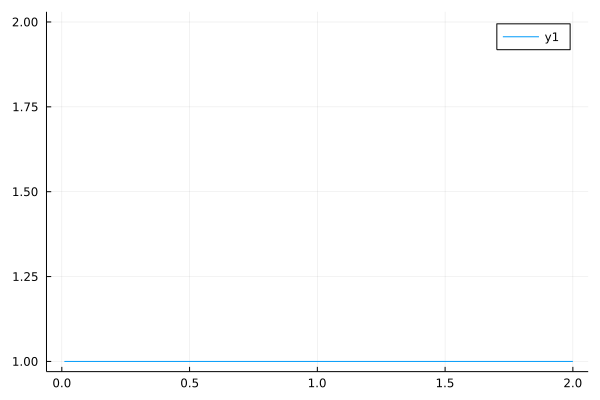

In [9]:
plot(x, cond.(x -> 1e-16x, x))

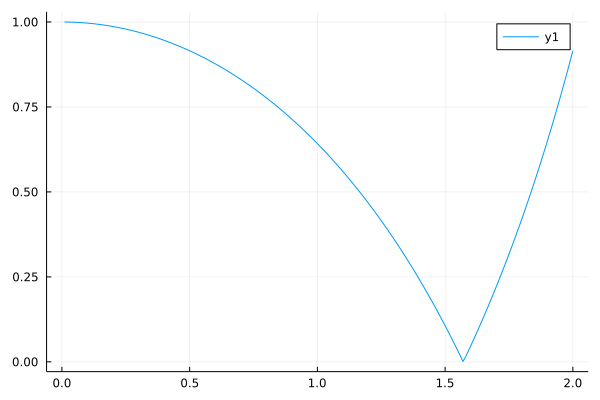

In [10]:
plot(x, cond.(x -> sin(x), x))

In [11]:
relerr(f, x, Δx) = abs(f(x+Δx) - f(x)) / abs(f(x))
roundoff(T::Type, x) = T(x) - x
relroundoff(T::Type, x) = abs(roundoff(T, x)) / abs(x)

relroundoff (generic function with 1 method)

In [17]:
estcond32(f, x) = relerr(f, x, roundoff(Float32, x)) / relroundoff(Float32, x)
estcond16(f, x) = relerr(f, x, roundoff(Float16, x)) / relroundoff(Float16, x)

estcond16 (generic function with 1 method)

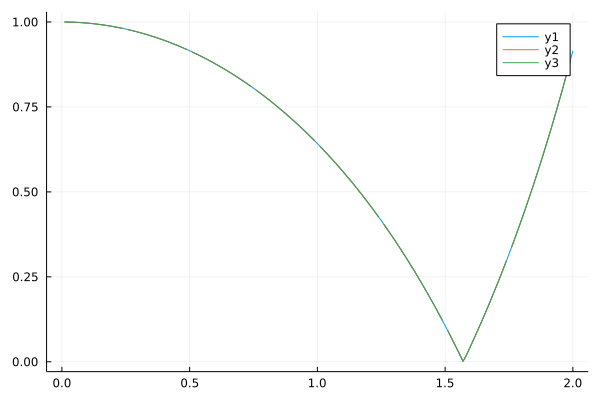

In [20]:
plot(x, [cond.(sin, x), estcond32.(sin, x), estcond16.(sin, x)])

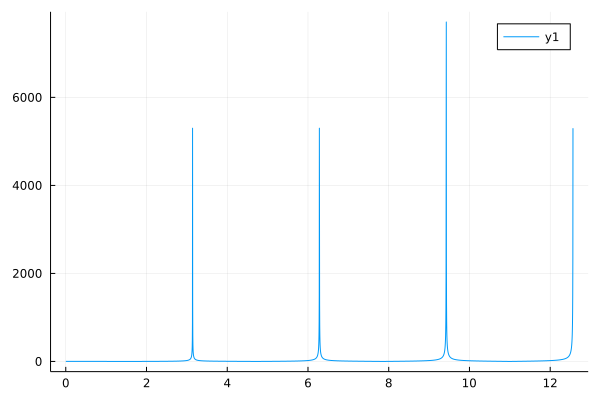

In [42]:
x = 0:0.003:4π
plot(x, cond.(sin, x))

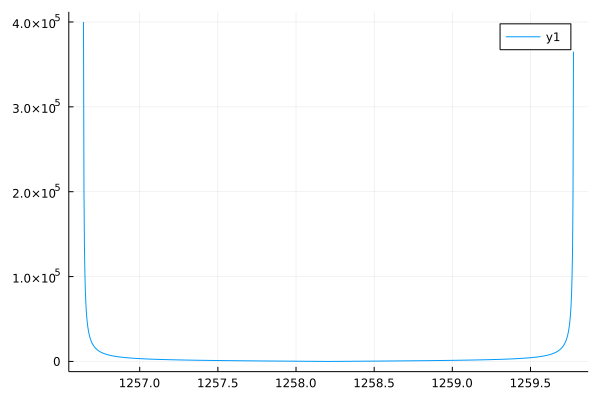

In [47]:
x = 400.001π:0.003:400.999π
plot(x, cond.(sin, x))

The condition number $$\kappa_f(x) = \frac{xf'(x)}{f(x)}$$ balances the size of $x$, $f'(x)$, and $f(x)$.

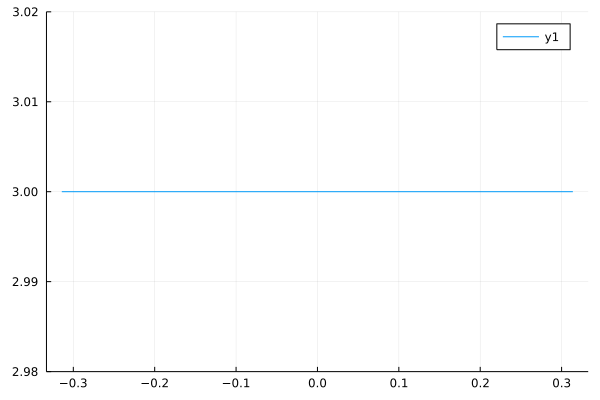

In [66]:
x = (-0.1π):0.001:0.1π
plot(x, cond.(x->x^3, x), ylim=(2.98,3.02))

Why is the condition number for a cubic a constant? Autodiff doesn't solve all your problems, you still need algebra.

Condition number is $$\kappa_f(x) = \left| \frac{xf'(x)}{f(x)}\right |$$ Plug in $f(x) = x^3$ and you get $$\frac{x\cdot 3x^2}{x^3} = 3$$ 

That works for any power $p$.

Because the derivative of a monomial $x^p$ is $px^{p-1}$ all the $x$ values cancel leaving you with a constant!